In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import warnings
warnings.filterwarnings("ignore")

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 1)

In [7]:
test_images.shape

(10000, 32, 32, 3)

In [9]:
test_labels.shape

(10000, 1)

In [10]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

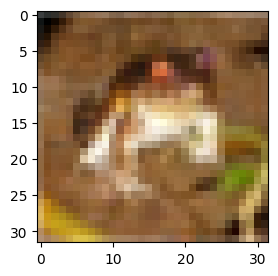

In [11]:
plt.figure(figsize=(4, 3))
plt.imshow(train_images[0])
plt.show()

In [12]:
train_labels[0]

array([6], dtype=uint8)

In [13]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

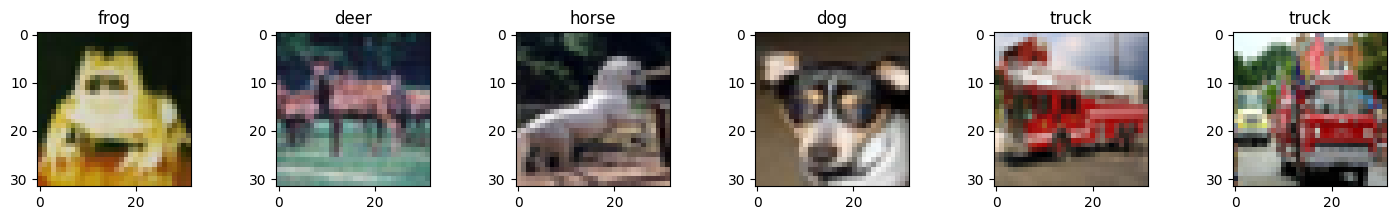

In [26]:
plt.figure(figsize=(18, 2))
for i in range(6):
    np.random.seed(i+65)
    index = np.random.randint(0, 50000)
    plt.subplot(1, 6, i+1)
    plt.imshow(train_images[index])
    plt.title(classes[train_labels[index][0]])
plt.show()

In [28]:
train_images[345]/255

array([[[0.34901961, 0.51372549, 0.23529412],
        [0.33333333, 0.49803922, 0.21568627],
        [0.31764706, 0.48627451, 0.19607843],
        ...,
        [0.80784314, 0.73333333, 0.90980392],
        [0.80392157, 0.7254902 , 0.91764706],
        [0.78823529, 0.70980392, 0.90588235]],

       [[0.32156863, 0.47843137, 0.21568627],
        [0.35294118, 0.50588235, 0.23529412],
        [0.32941176, 0.47843137, 0.20392157],
        ...,
        [0.81176471, 0.7372549 , 0.91372549],
        [0.80392157, 0.7254902 , 0.90980392],
        [0.78431373, 0.70980392, 0.90196078]],

       [[0.33333333, 0.48235294, 0.21176471],
        [0.36470588, 0.49803922, 0.22745098],
        [0.38039216, 0.50196078, 0.22745098],
        ...,
        [0.81176471, 0.74117647, 0.91372549],
        [0.80784314, 0.73333333, 0.90980392],
        [0.79607843, 0.71764706, 0.90196078]],

       ...,

       [[0.2745098 , 0.38039216, 0.19215686],
        [0.2627451 , 0.36862745, 0.18823529],
        [0.29019608, 0

In [29]:
train_images, test_images = train_images/255.0, test_images/255.0

In [44]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    # Dense(64, activation="relu"),
    # Dense(120, activation="relu"),
    # Dense(250, activation="relu"),
    Dense(500, activation="relu"),
    Dense(250, activation="relu"),
    Dense(150, activation="relu"),
    # Dense(80, activation="relu"),
    # Dense(30, activation="relu"),
    Dense(10, activation="softmax")
])

In [45]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [46]:
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
782/782 [==============================] - 15s 19ms/step - loss: 1.8656 - accuracy: 0.3209 - val_loss: 1.6910 - val_accuracy: 0.3919
Epoch 2/30
782/782 [==============================] - 19s 24ms/step - loss: 1.6681 - accuracy: 0.4008 - val_loss: 1.6278 - val_accuracy: 0.4192
Epoch 3/30
782/782 [==============================] - 18s 23ms/step - loss: 1.5842 - accuracy: 0.4313 - val_loss: 1.6094 - val_accuracy: 0.4248
Epoch 4/30
782/782 [==============================] - 18s 23ms/step - loss: 1.5271 - accuracy: 0.4573 - val_loss: 1.5390 - val_accuracy: 0.4510
Epoch 5/30
782/782 [==============================] - 15s 20ms/step - loss: 1.4838 - accuracy: 0.4681 - val_loss: 1.5282 - val_accuracy: 0.4560
Epoch 6/30
782/782 [==============================] - 17s 21ms/step - loss: 1.4531 - accuracy: 0.4811 - val_loss: 1.4942 - val_accuracy: 0.4674
Epoch 7/30
782/782 [==============================] - 17s 22ms/step - loss: 1.4227 - accuracy: 0.4904 - val_loss: 1.4558 - val_accuracy:

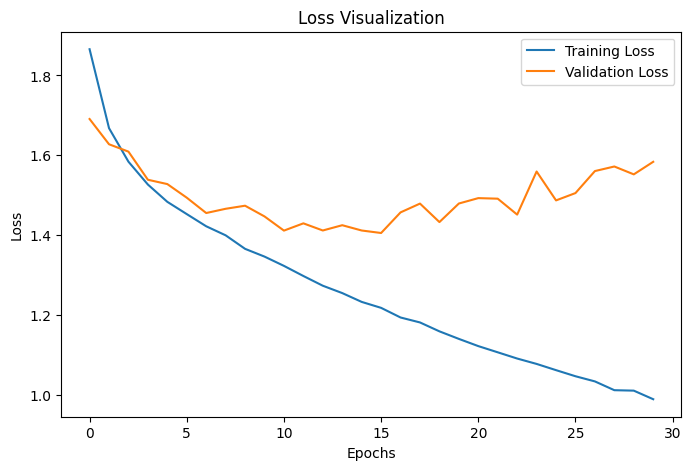

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

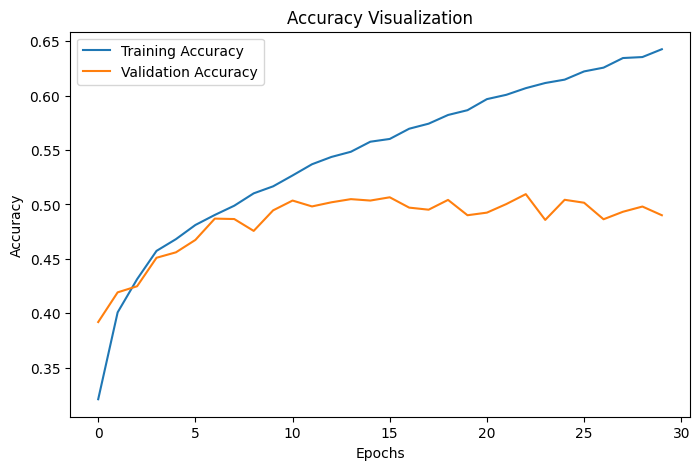

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [52]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
y_pred = np.argmax(y_pred, axis=1)

In [63]:
accuracy_score(test_labels.ravel(), y_pred)

0.4901

In [65]:
print(classification_report(test_labels.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55      1000
           1       0.56      0.64      0.60      1000
           2       0.34      0.46      0.39      1000
           3       0.36      0.32      0.34      1000
           4       0.40      0.47      0.43      1000
           5       0.46      0.30      0.36      1000
           6       0.53      0.53      0.53      1000
           7       0.58      0.52      0.55      1000
           8       0.56      0.68      0.62      1000
           9       0.61      0.43      0.51      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [66]:
import seaborn as sns

<Axes: >

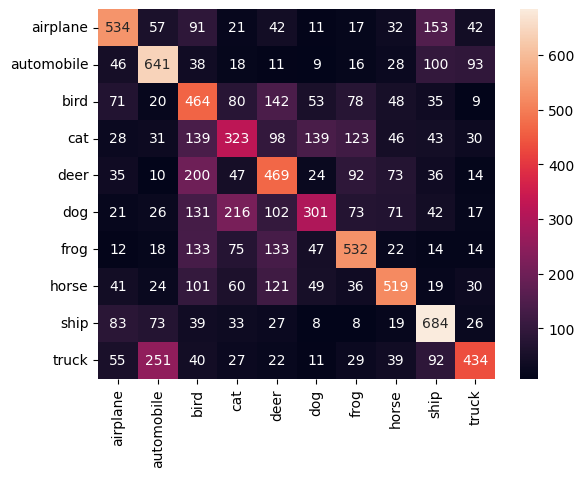

In [70]:
sns.heatmap(confusion_matrix(test_labels.ravel(), y_pred), annot=True, fmt="d", 
            xticklabels=classes, yticklabels=classes)

In [ ]:
pip install scikit-learn

In [71]:
def make_predictions(img_path):
    img = load_img(img_path, target_size=(32, 32))
    img_arr = img_to_array(img)
    norm = img_arr / 255.0
    flatten = np.expand_dims(norm, axis=0)
    pred = model.predict(flatten)[0]
    pred_class = classes[np.argmax(pred)]
    return pred_class

In [72]:
make_predictions("car.png")

1/1 [==============================] - 0s 32ms/step


'automobile'

In [73]:
make_predictions("horse.png")

1/1 [==============================] - 0s 30ms/step


'horse'

In [74]:
make_predictions("frog.png")

1/1 [==============================] - 0s 50ms/step


'frog'

In [76]:
make_predictions("plane.png")

1/1 [==============================] - 0s 36ms/step


'airplane'

In [77]:
make_predictions("truck.png")

1/1 [==============================] - 0s 42ms/step


'ship'